# Logistic Regression Tutorial Pt. 1
<br>
So far we have been covering regression algorithms, ie predicting continuous variables such as a house being $1204.12. We will now move into classification algorithms where the problem lies in predicting categorical variables. The simplest categorical variables to work with are binary values - when there are only two types of results to predict on. In this tutorial, we are given training data on various students' exam 1 and exam 2 scores along with their result of being admitted into some school. This is a classification problem with binary results because we need to classify either a "yes" or a "no" to whether the student is admitted based on their test scores. Ok let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import pdb

pd.options.display.max_rows = 10 # printed df will be max 10 rows

In [2]:
df = pd.read_csv('ex2data1.txt', names=['Exam 1 score', 'Exam 2 score', 'Admitted?'])

print(df)

    Exam 1 score  Exam 2 score  Admitted?
0      34.623660     78.024693          0
1      30.286711     43.894998          0
2      35.847409     72.902198          0
3      60.182599     86.308552          1
4      79.032736     75.344376          1
..           ...           ...        ...
95     83.489163     48.380286          1
96     42.261701     87.103851          1
97     99.315009     68.775409          1
98     55.340018     64.931938          1
99     74.775893     89.529813          1

[100 rows x 3 columns]


Observe that the last column has values of either 0 or 1. Note that 0 will represent False (student not admitted) and 1 will represent True (student is admitted). Let us now visualize our data.

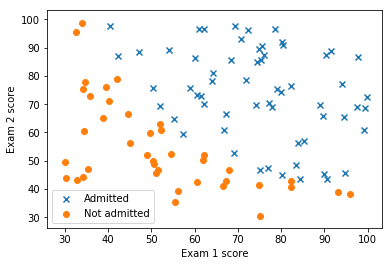

In [3]:
admitted = df[df['Admitted?'] == 1] # splitting admitted and notAdmitted for legend
notAdmitted = df[df['Admitted?'] == 0]

plt.scatter(admitted['Exam 1 score'], admitted['Exam 2 score'], marker='x', label="Admitted")
plt.scatter(notAdmitted['Exam 1 score'], notAdmitted['Exam 2 score'], marker='o', label="Not admitted")
plt.legend()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

Notice from the above graph you can kind of figure out a **decision boundary** where students are classified to be admitted or not admitted. Through logistic regression, we are going to mathematically figure out the decision boundary line. But first we need to introduce the **sigmoid function**, an important ingredient to the logistic regression recipe. The sigmoid function is represented by the following equation and graph:

$$ g(z) = \frac{1}{1+e^z} $$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

Notice that the sigmoid function maps any real number to a real number between the open interval (0,1). Thus our new **hypothesis function** will be constrained between 0 and 1 also:

$$ h_{\theta}(x) = g(\theta^Tx) = \frac{1}{1+e^{-\theta^Tx}} $$

$h_{\theta}(x)$ will now give us the **probability** that our output is 1. That is, if $h_{\theta}(x) = 0.7$ then there is a 70% chance that y is = 1. (On another note, how can we determine the decision boundary from the sigmoid function?)
<br>
<br>
For predicting purposes, if $h_{\theta}(x) \ge 0.5$, then we predict y to be 1 and if $h_{\theta}(x) < 0.5$, then we predict y to be 0. Let's write the sigmoid function below.

In [4]:
def sigmoid(x):
    return 1.0/(1+ math.exp(-x))

# check if sigmoid makes sense
print(sigmoid(4)) # larger x -> 1
print(sigmoid(-9)) # smaller x -> 0
print(sigmoid(0)) # x = 0 -> 0.5

# sigmoidMatrix applies the sigmoid fn to each element for a given matrix
def sigmoidMatrix(matrix):
    for x in np.nditer(matrix, op_flags=['readwrite']):
        x[...]=sigmoid(x)
    return matrix

0.9820137900379085
0.00012339457598623172
0.5


It is also important to change our cost funtion for logistic regression. Recall that our hypothesis function is $h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$, which is a "strange" looking function. If we kept the same cost function that we used for linear regression while using the sigmoid hypothesis function, the cost function graph will be non-convex, which means lots of local minima exist and gradient descent will not work to find the global minimum. Therefore, a new cost function is needed for logistic regression and is represented by the following equation:

$$ Cost = \frac{-1}{m} \sum_{i = 1}^m [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1-h_\theta(x^{(i)}))] $$

Writing the cost function in this form ensures that the cost function graph will be convex. We are going to vectorize our cost function implementation, which are represented by these equations:

$$ h = g(X\theta) $$
$$ Cost = \frac{1}{m} \dot{} (-y^T\log(h) - (1-y)^T\log(1-h)) $$

Let's implement and test our cost function!

In [5]:
def computeCost(theta, X, y):
    theta = np.matrix(theta)
    m = len(y)
    h = sigmoidMatrix(X*theta.T) # vectorization
    cost = (-y.T * np.log(h) - (1-y).T * np.log(1-h))/m
    return cost[0,0]

X_matrix = df.as_matrix(df.columns[:-1])
X_matrix = np.insert(X_matrix, 0, 1, axis=1) 
# remember to insert column of 1's for X_0 intercept

X_matrix = np.matrix(X_matrix)
y = np.matrix(df[df.columns[-1:]]) # admitted or not
theta = np.zeros(X_matrix.shape[1]) # initialize theta to be 0

print(computeCost(theta,X_matrix,y))

0.69314718056


Great! The cost is around 0.693 which is exactly what the assignment indicates. Now onto gradient descent algorithm for logistic regression. For each iteration of gradient descent, set:

$$ \theta_i = \theta_i - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)} $$
where
$$ h_\theta(x^{(i)}) = \frac{1}{1+e^{-\theta^Tx^{(i)}}} $$

However for this assignment we are asked to only compute the **gradient** (which is the $\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}$ term) and use the gradient for advanced optimization techniques. These advanced optimization techniques will also find the value of $\theta$ that will minimize the cost function but at a faster rate than gradient descent. You also don't have to prescribe your own learning rate. The drawback of these advanced optimization techniques is that it is hard to understand, thus we will be using **scipy**'s library to do the optimization for us.

In [6]:
def gradient(theta, X, y):
    theta = np.matrix(theta) # important to have this line or else fmin_tnc won't work
    m = len(y)
    error = sigmoidMatrix(X*theta.T) - y # vectorized
    gradient = (X.T * error) / m
    return gradient

from scipy.optimize import fmin_tnc 

minimum = fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X_matrix, y))
cost = computeCost(minimum[0],X_matrix,y)
new_theta = np.matrix(minimum[0])

print (cost, "\n")
print ("Theta:")
print (new_theta[0,0])
print (new_theta[0,2])
print (new_theta[0,1])

0.203497701589 

Theta:
-25.1613186033
0.20147148619
0.206231588103


Nice! Using the gradient and scipy's advanced optimization method, we reach a final minimum cost of 0.203 with 
<br>
<br>
$$ \begin{equation}
     \theta =\begin{bmatrix}
         -25.1613186 \\
         0.20623159 \\
         0.20147149
        \end{bmatrix}
  \end{equation} $$
  
To test our theta value, let's make a prediction for a student with exam 1 score of 45 and exam 2 score of 85. As the assignment indicates, the probability that the student is admitted should be around 0.776.

In [7]:
def predict(exam1, exam2, theta):
    grade = np.matrix([1,exam1,exam2])
    probability = sigmoid(grade*theta.T)
    if probability >= 0.5:
        print("Student will be admitted with probability: " 
              + str(probability))
    else:
        print("Student will not be admitted with probability: " 
              + str(probability))
    return

predict(45,85,new_theta)

Student will be admitted with probability: 0.7762906244930341


So far so good! Finally let's plot the decision boundary so we can visualize our work so far. Recall that the decision boundary is the line which separates y = 0 and y = 1, that is when the hypothesis function, $h_\theta(x) = 0.5$. Thus:

\begin{align*}
h_\theta(x) &= \frac{1}{1+e^{-\theta^Tx}} = 0.5 \\
 &\Leftrightarrow e^{-\theta^Tx} = 1 \\
 &\Leftrightarrow -\theta^Tx = 0 \\
 &\Leftrightarrow \theta_0 + \theta_1x_1 + \theta_2x_2 = 0 \\
\end{align*}



Therefore, to solve for $x_2$ (which is our y axis):

$$ x_2 = \frac{-\theta_1x_1 - \theta_0}{\theta_2} $$

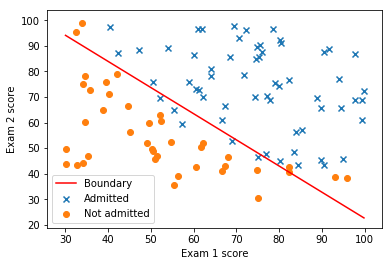

In [8]:
#plotting

x_range = np.linspace(df['Exam 1 score'].min(), df['Exam 1 score'].max(), 100) 
# generates array of 100 evenly spaced numbers (not necessarily integers)
# from df['Exam 1 score'].min() to df['Exam 1 score'].max()

y_line = (- new_theta[0,1]*x_range - new_theta[0,0]) / new_theta[0,2]
# see derivation above

plt.plot(x_range, y_line, label="Boundary", color="red")
plt.scatter(admitted['Exam 1 score'], admitted['Exam 2 score'], marker='x', label="Admitted")
plt.scatter(notAdmitted['Exam 1 score'], notAdmitted['Exam 2 score'], marker='o', label="Not admitted")
plt.legend()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

The decision boundary looks good! Congrats for making past the first half of the assignment! For the next tutorial we will introduce the important concept of **regularization** and practice with more logistic regression for the second half of the assignment. See you there!